In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/camilasilvam/LT_challenge/main/dataset_SCL.csv", low_memory=False , 
                   dtype =  {"Vlo-I" : "string" ,
                             "Ori-I" : "string" ,
                             "Des-I" : "string", 
                             "Emp-I": "string" , 
                             "Vlo-O": "string" ,
                             "Ori-O" : "string" ,
                             "Des-O" : "string" ,
                             "Emp-O"  : "string" ,
                             "DIANOM" : "string" ,
                             "TIPOVUELO"  : "string" ,
                             "OPERA" : "string" ,
                             "SIGLAORI" : "string" ,
                             "SIGLADES" : "string"})
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


# Exploratory analysis
- Cleaning data and identify correct type of data
- Null values
- Unique values
- Relationship among variables
- Potential Validations
- visualization (to fully understand the data)

In [2]:
#Assign accurate data type for Fecha-I and Fecha-O
df.loc[:,"Fecha-I" ] = pd.to_datetime(df.loc[:,"Fecha-I" ])
df.loc[:,"Fecha-O"] = pd.to_datetime(df.loc[:,"Fecha-O"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  string        
 2   Ori-I      68206 non-null  string        
 3   Des-I      68206 non-null  string        
 4   Emp-I      68206 non-null  string        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  string        
 7   Ori-O      68206 non-null  string        
 8   Des-O      68206 non-null  string        
 9   Emp-O      68206 non-null  string        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  string        
 14  TIPOVUELO  68206 non-null  string        
 15  OPERA      68206 non-null  string        
 16  SIGLAORI   68206 non-null  string       

All variables seem to have its intended data type

In [3]:
#Null values
df.isnull().sum(axis=0)

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [4]:
#Only 1 row with null value and given the amount of data and simplicity in modelig: it will be removed.

df.loc[df.loc[:,"Vlo-O"].isnull(), :]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,<NA>,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [5]:
#delete row with missing value
df.dropna( axis=0, inplace=True)

In [6]:
#chech how many unique values I can find on each column
df.nunique()

Fecha-I      53252
Vlo-I          584
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          861
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64


**Variables**
I will analize each variable and see potential relationships with other variables based on their unique values (count). 

- Fecha-I: it makes sense to have multiples values as it includes date and time combination. (53252). 
-Fecha-O :    (62774)
____
- Vlo-I: It's an "kind of" ID for flights (584)
- Vlo-O: (861). 
Even when this is a "number" there are letters on it. [Adress later]
____
- Ori-I: (1) Data provided from 1 origin. It can be deleted for this analysis purposes.
-Ori-O: (1) It can also be deleted.
- SIGLAORI (1)
____
- Des-I: (64) Destination Id, it should match with Des-O and SIGLADES
- Des-O: (63)
- SIGLADES: (62)
____
- Emp-I:( 30) This variable should match with Emo-O, which is not the case.
- Emp-O: The change shows a flight can be operate for a different Airline (32)
- OPERA: I was expecting this variable matches perfectly with "Emp-O" but it shows less unique values (23)
____
**Variables for flight operation**
- DIA             31
- MES             12
- AÑO              2
- DIANOM           7
-TIPOVUELO: Variable for national and international flights (2)




1. How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

#Visualizations 

In [7]:
#besides some distributions by variables the dataset already have, I will add the hour from scheadule and operational hour
df.loc[:,"Fecha-I_hour" ]= df.loc[:,"Fecha-I" ].dt.hour
df.loc[:,"Fecha-O_hour" ]= df.loc[:,"Fecha-O" ].dt.hour

<Figure size 640x480 with 0 Axes>

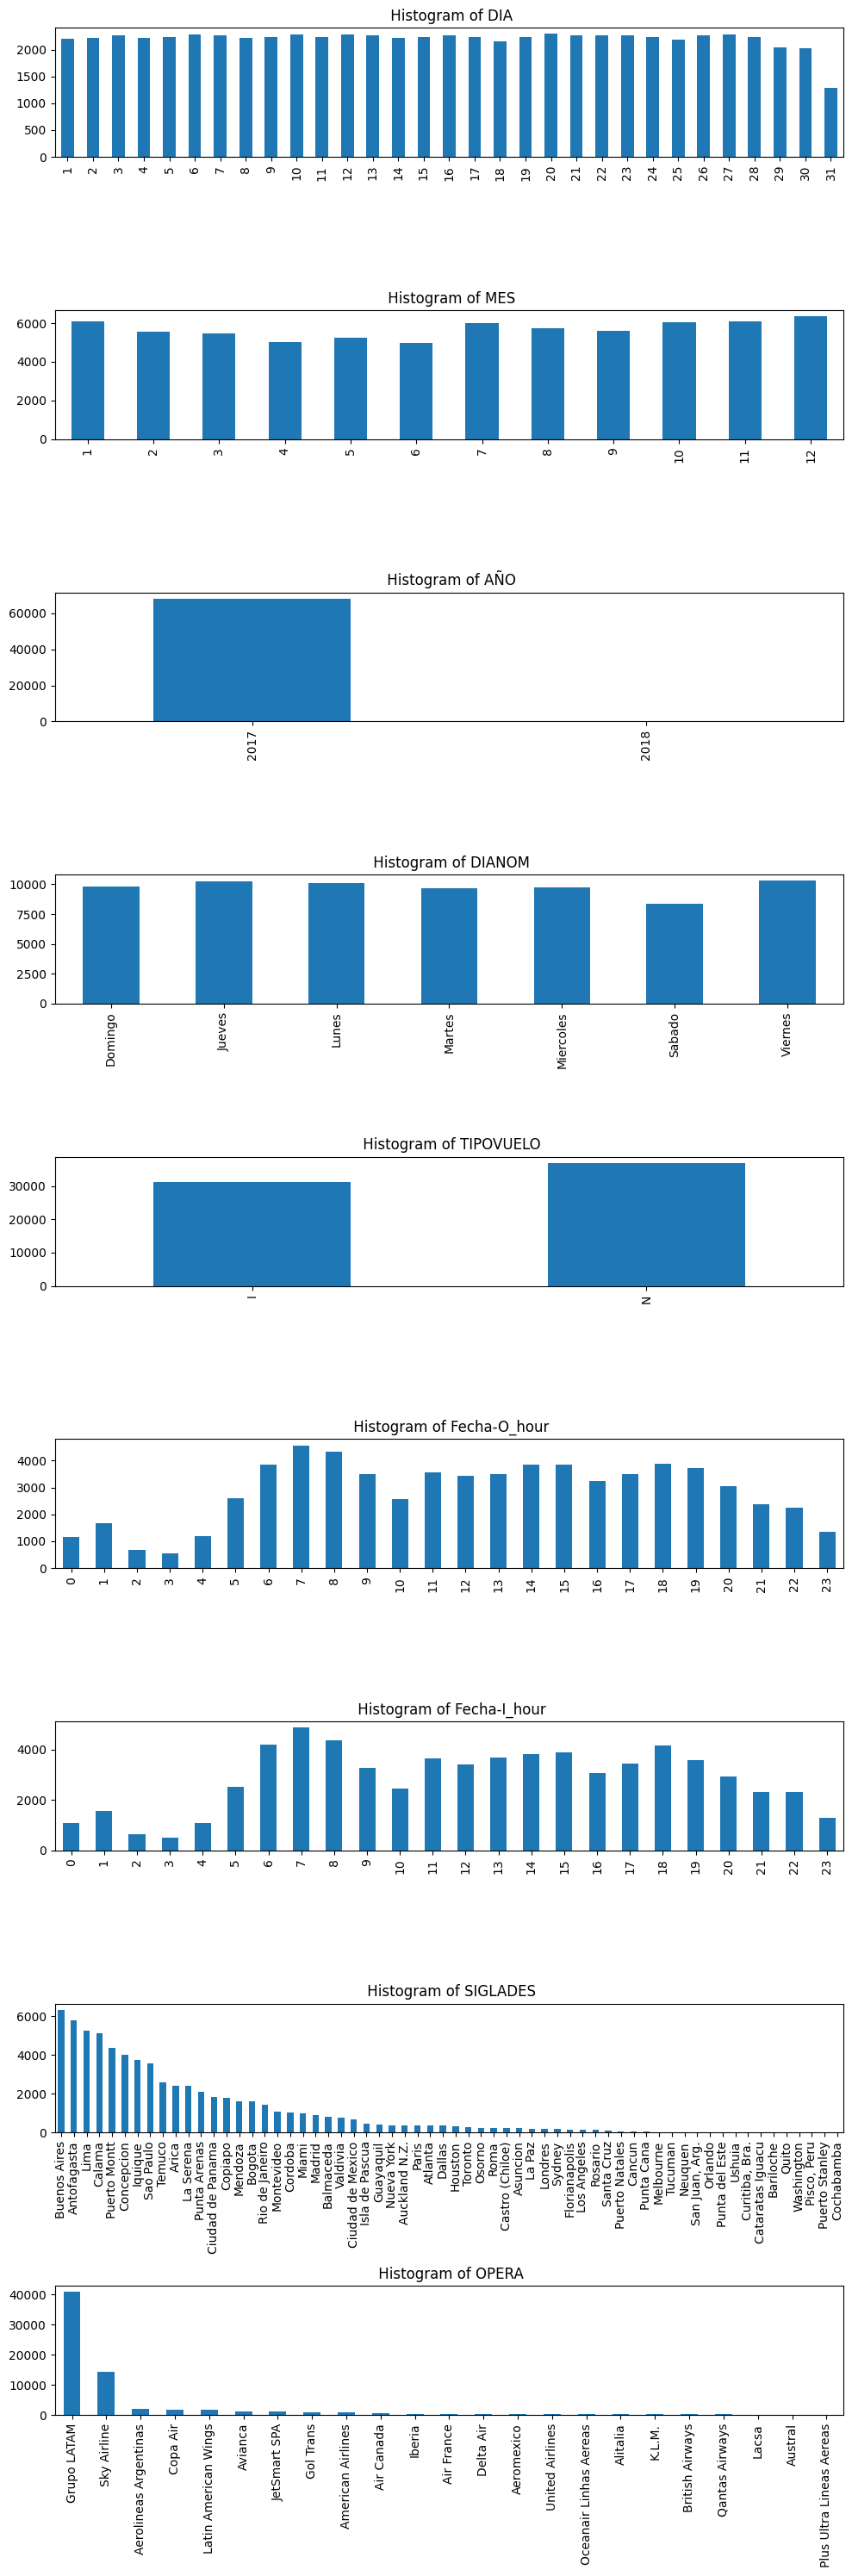

In [8]:
import matplotlib.pyplot as plt

#All distributions will be display based on operation information.- Except for hour scheaduled
list_col =  ["DIA" , "MES" , "AÑO" , "DIANOM" , "TIPOVUELO" , "Fecha-O_hour" , "Fecha-I_hour", "SIGLADES" , "OPERA"]


fig = plt.figure()
fig,ax = plt.subplots(9,1 , figsize=(10,30))

for i, col in enumerate(list_col):
    if (col == "SIGLADES") or (col == "OPERA") : df[col].value_counts().plot(kind="bar", ax=ax[i], title=f' Histogram of {col}') #If destination or airline, sort by values
    else: df[col].value_counts().sort_index().plot(kind="bar", ax=ax[i], title=f' Histogram of {col}')

fig.tight_layout()
plt.show()

There is a uniform distribution for the day the flight operates, with a decrease in frequency for the 31st day. It is important to consider that not all months have 31 days, so it is an expected decrease. Regarding the months, the autumn months (March to June) have less frequency of flights than the rest of the year. Regarding the year the data provided is from 2017, so the 2018 operating values must be analyzed if they are errors in the data or represent a case study. [Adress Later]

Regarding the distribution on the days of the week, the distribution is uniform with the exceptional case of Saturday where flights are reduced.

Regarding the type of flight, there are more domestic flights than international ones.

When observing the scheduled and operating hours of the flights, it is possible to clearly see peak hours and others with low frequency. The behaviour does not change that much between scheadule to actual hour flight. Time could be an important variable to predict flight delays.


2. Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:
○ high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
○ min_diff : difference in minutes between Date-O and Date-I .
○ delay_15 : 1 if min_diff > 15, 0 if not.
○ period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
onDate-I .


In [9]:
# 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
df["Fecha-I_date"] = df.loc[:,"Fecha-I" ].dt.date

b = pd.Timestamp('03/03/2017')
c = pd.Timestamp('07/15/2017')
d = pd.Timestamp('07/31/2017')
e = pd.Timestamp('09/11/2017')
f = pd.Timestamp('09/30/2017')
g = pd.Timestamp('12/15/2017')

df["high_season"]= df.apply(lambda x: 1 if x["Fecha-I_date" ] < b else 
                                      (1 if (x["Fecha-I_date" ] >c) & (x["Fecha-I_date" ]< d) else 
                                      (1 if (x["Fecha-I_date" ] >e) & (x["Fecha-I_date" ] < f)else
                                      (1 if (x["Fecha-I_date" ] >g)  else 0))),axis=1)
#warning message (adress later)


<ipython-input-9-98c88bc57571>:11: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df["high_season"]= df.apply(lambda x: 1 if x["Fecha-I_date" ] < b else
<ipython-input-9-98c88bc57571>:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (1 if (x["Fecha-I_date" ] >c) & (x["Fecha-I_date" ]< d) else
<ipython-input-9-98c88bc57571>:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (1 if (x["Fecha-I_date

In [10]:
# min_diff : difference in minutes between Date-O and Date-I .
#logic: get the difference between both datetime, get the seconds and divide by 60. convert to interger so I obtain only complete minutes

var = (df.loc[:,"Fecha-O" ] - df.loc[:,"Fecha-I" ])
df["min_diff"] =  (var.dt.total_seconds()/60).astype(int) 

In [11]:
#delay_15 : 1 if min_diff > 15, 0 if not.
df["delay_15"]= df.apply(lambda x: 1 if x["min_diff"] > 15 else 0,axis=1)

In [13]:
#period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based on Date-I

df

df["period_day"]= df.apply(lambda x: "morning" if (x["Fecha-I_hour" ] >= 5) & (x["Fecha-I_hour" ] <= 11) else 
                                      ("afternoon" if (x["Fecha-I_hour" ] >= 12) & (x["Fecha-I_hour" ] <= 18)  else 
                                      "night" ),axis=1)

# Export CSV as requested

The intial dataset will be exported with new variables. 
auxiliar variables will be deleted for exportation purposes

In [12]:
#Let's proceed to delete useless variables (unique values)
df.drop(["Fecha-I_date" , "Fecha-I_hour" , "Fecha-O_hour" ] ,axis=1 ).to_csv("synthetic_features.csv", index=False)

## Assumption (As I do not know the business)
The changes on flight number, destination and airline are possible and do not reprensent a data issue.

#Assumption
The target variable will be delay_15. According to this, only a delay greater than 15 minutes will be consider as "delay".

In [ ]:
#Let's see how df looks like
df.head()

3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What
variables would you expect to have the most influence in predicting delays?


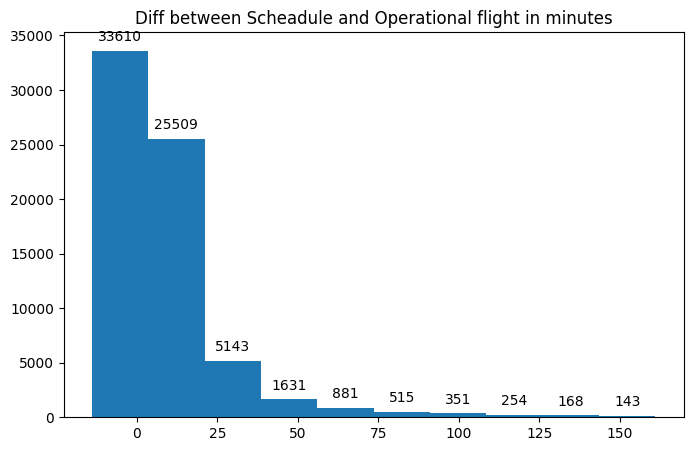

In [15]:
#Visualize the delays in minutes
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df.loc[:,"min_diff"])

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(rect.get_x()+rect.get_width()/2, height), #to provide extra information I make annotate to see the frequency of each bin.
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', 
                va='bottom') 
    
plt.title("Diff between Scheadule and Operational flight in minutes")
plt.show()

<Figure size 640x480 with 0 Axes>

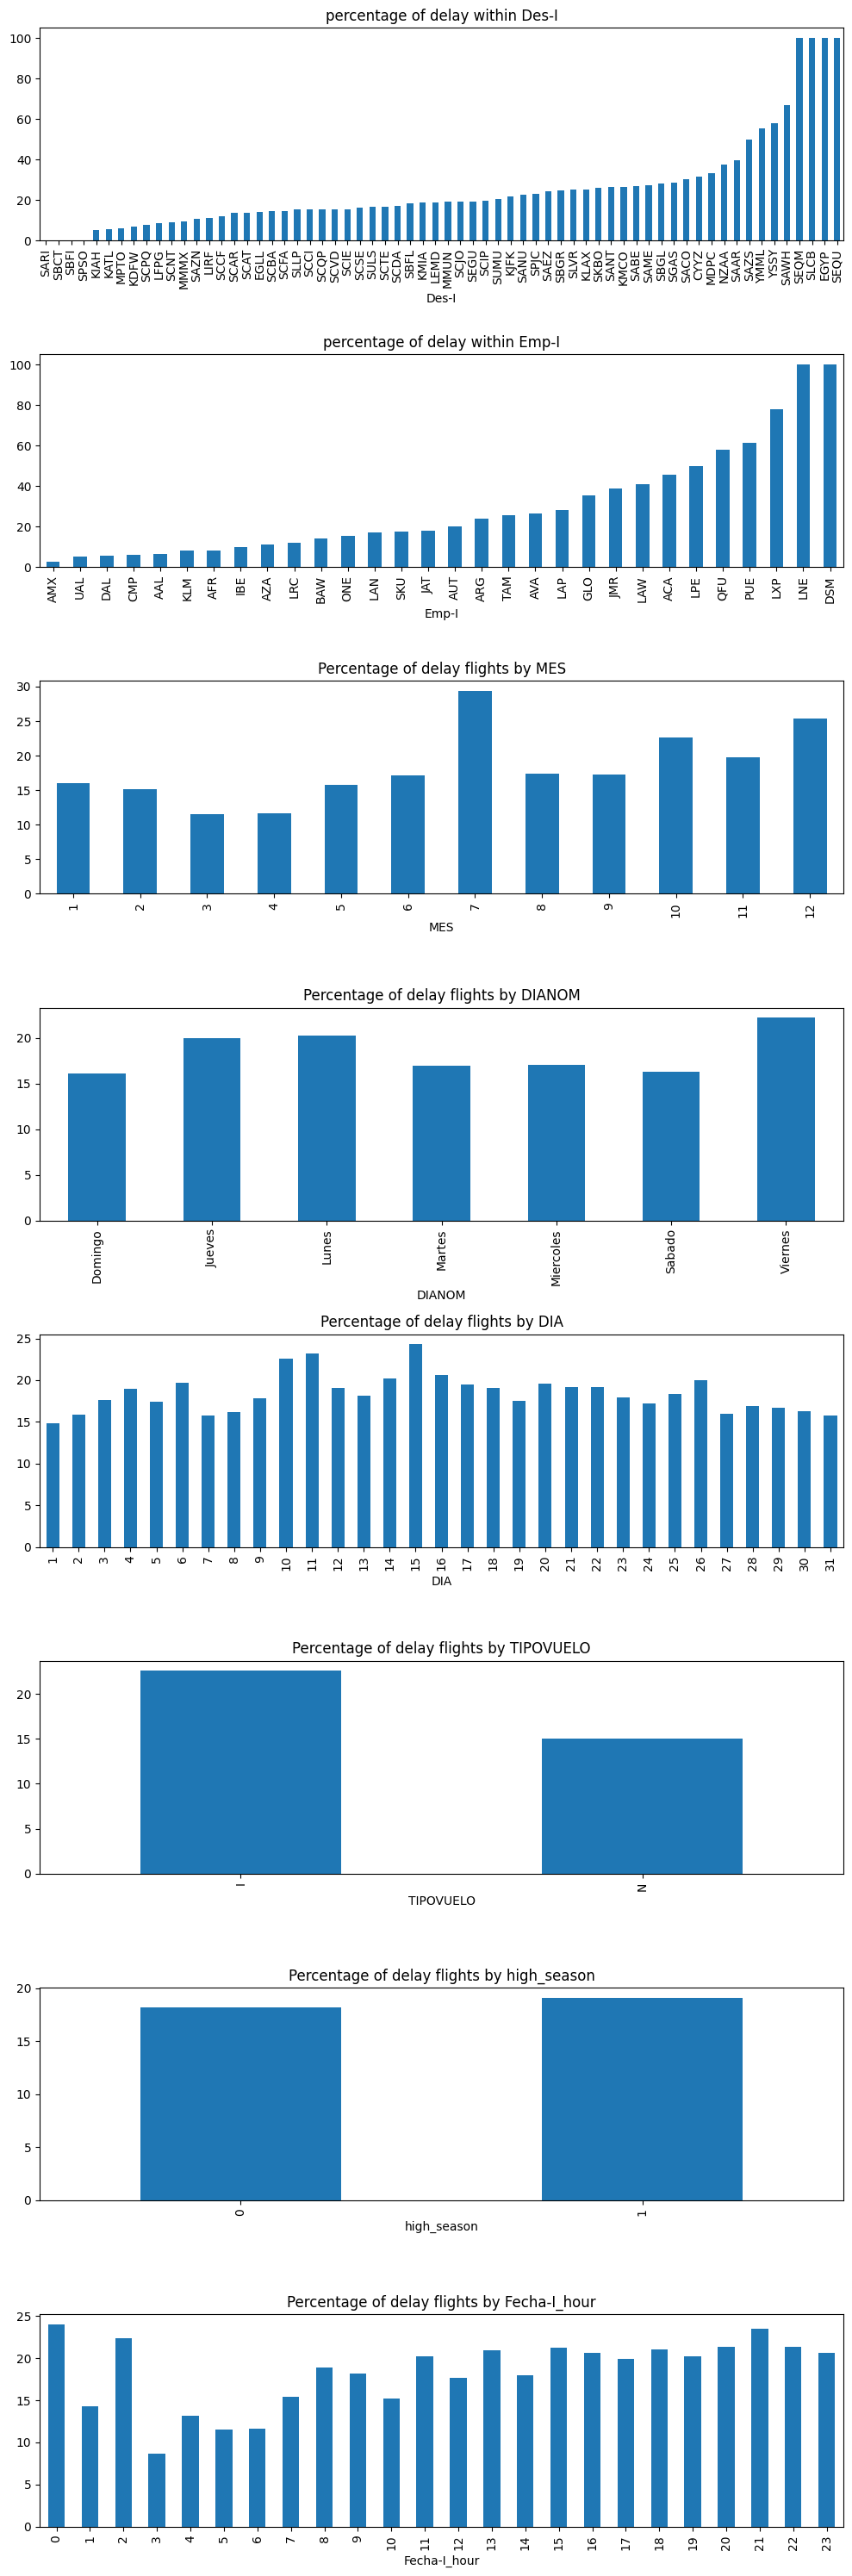

In [16]:
#See how every variable shows delay in percentage.
list_col =  ["Des-I" , "Emp-I",  "MES" ,  "DIANOM" , "DIA" , "TIPOVUELO" , "high_season" ,  "Fecha-I_hour"]


fig = plt.figure()
fig,ax = plt.subplots(8,1 , figsize=(10,30))

for i, col in enumerate(list_col):
    #create pivot table to calculate %
    pivot_aux= df.pivot_table(index = col,  values = "delay_15", aggfunc = ["sum" , "count" ])
    pivot_aux[(  '%', 'delay_15')] = pivot_aux[(  'sum', 'delay_15')]*100/ pivot_aux[(  'count', 'delay_15')]

    if (col == "Des-I") or (col == "Emp-I") : pivot_aux[(  '%', 'delay_15')].sort_values().plot(kind="bar", ax=ax[i], title=f'percentage of delay within {col}') 
    else: pivot_aux[(  '%', 'delay_15')].plot(kind="bar", ax=ax[i], title=f'Percentage of delay flights by {col}') 

fig.tight_layout()
plt.show()

There are destinations that have a 100% delay rate. It is important to analyze if the number of flights to these destinations is high or if they are a couple of cases. [Address Later].If the number of flights is high, it would be important to analyze these cases separately from the rest of the data.


Regarding the month of the flight, it is expected that vacation months (in Chile) have more flights, a greater number of flights can imply a greater number of delays, however, when viewing the rate of delays, we identify that the month can be an interesting variable to analyze. I consider it important to mention that the month alone would not be the explanation for the flight delay, but rather the activity at the airport in those months, since the more flights, the more difficult it can be to coordinate the logistics behind and ensure that the flights leave at the desired time. 

Regarding the day, Friday presents the highest rate of delay followed by Monday and Thursday.

Depending on the day of the month, there is high variability in the percentage of delayed flights. Although the variable that groups the hours was created, there is information that was not captured, for example during one morning there are also differences in delays of almost 10%.

In international flights there is a higher percentage of delayed flights. Like the day of the week, this variable should be understood as a representation of everything that an international flight implies (greater amount of paperwork from the airline and from the passengers, more nervousness on the part of the passengers, more suitcases, etc. )
  The difference between high season or not does not present a major difference in the percentage of delayed flights.

Finally, the time shows great variability in the percentage, so it can be a variable that impacts the target variable.

In [17]:
#Let's proceed to delete useless variables (unique values)
df.drop(["Ori-I" , "Ori-O" , "SIGLAORI" ] ,axis=1 , inplace= True)

4. Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.
5. Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used
to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in
the prediction task? How could you improve the
Performance?


#Modeling

### **My proposed model will predict the delay of any flight (1 ó 0 ), it is not going to measure how "late" the flight is.**

###The treatment for initial variables for modeling purposes:


*   Fecha-I -> split in date (day_calendar , day_week , month) and time  (hour)
*   Vlo-I -> too many categories. An interesting fact to analyze is the change on flight number. I will delete de variable as it is and only use it to create a new one that reflect the change on flight numbers (num_change)

*   Ori-I -> Deleted
*   Des-I -> Same logic as "Vlo-I" (des_change)
*   Emp-I -> Same logic as "Vlo-I" (airline_change)

*   Fecha-O -> This variable is used for target variable. Delete as it is and use only target one (delay_15)
*   Vlo-O -> Used with "num_change". Variable to be discarded


*   Ori-O -> Deleted

*   Des-O -> Used with "des_change"
*   Emp-O -> Used with "airline_change"



*   DIA , MES , AÑO , DIANOM-> Based on Fecha-O and will be discarded as it is part of the efect of delay.

*   TIPOVUELO -> This variable will be use as it is.

*   OPERA , SIGLAORI ,SIGLADES -> These variables will be removed as they are associated to the operational information. SiglaOri has been already deleted



### Extra requested variables


*   high_season -> This variable will be used as it is.
*   min_diff -> This variable was used for target creation and will not be used.
*   Delay_15 -> Target variable
*   period_day -> This variable will be used - adjusted as needed. Even when this variable represent same information as the hour of the scheadule time, I will evaluate which is better for modeling purposes.



The nature of this problem is to predict delayed flights. Between the prediction of false negatives (I predict that there is no delay but the flight is delayed) and the false positives (I predict that the flight will be delayed but it is not) I am interested in reducing the first ones even if this implies increasing the second group. In this way, I can anticipate which flights might be delayed and act to prevent them.
In short, proposed models will be evaluated by accuracy complemented with "Precision" and "Recall". High accuracy means the clasificator is working fine but, as there is unbalance, the precision will tell us if there is high or lower false positive : Low precision indicates a high number of false positives, while High recall indicates a lower number of false negatives.


#Creating new variables

In [18]:
#Let's see "problematic cases"

#Change on Flight number

col_1 = df.loc[:,"Vlo-I"] 
col_2 = df.loc[:,"Des-O"]
prob_1 = []
for a,b in zip(col_1, col_2):
    if a !=b : prob_1.append(1)
    else: prob_1.append(0)

#Change on Destination

col_1 = df.loc[:,"Des-I"] 
col_2 = df.loc[:,"Des-O"]
prob_2 = []
for a,b in zip(col_1, col_2):
    if a !=b : prob_2.append(1)
    else: prob_2.append(0)

#change on airline


col_1 = df.loc[:,"Emp-I"] 
col_2 = df.loc[:,"Emp-O"]
prob_3 = []
for a,b in zip(col_1, col_2):
    if a !=b : prob_3.append(1)
    else: prob_3.append(0)

In [19]:
df["num_change"]= prob_1
df.loc[df.loc[:,"num_change"]==1, ["Vlo-I" , "Vlo-O" , "num_change" ] ]

#Adress later

,Vlo-I,Vlo-O,num_change
0,226,226,1
1,226,226,1
2,226,226,1
3,226,226,1
4,226,226,1
...,...,...,...
68201,400,400.0,1
68202,400,400.0,1
68203,400,400.0,1
68204,400,400.0,1


In [20]:
df["des_change"]= prob_2
df.loc[df.loc[:,"des_change"]==1, ["Des-I" , "Des-O" , "SIGLADES"] ]

,Des-I,Des-O,SIGLADES
1397,SCTE,SCQP,Temuco
7290,SCTE,SCQP,Temuco
7520,SCIE,SCQP,Temuco
8456,SCTE,SCQP,Temuco
12787,SCTE,SCQP,Temuco
12823,SCBA,SCTE,Puerto Montt
16169,KJFK,KMIA,Miami
16937,SEGU,SABE,Buenos Aires
18293,SCTE,SCQP,Temuco
20444,SCTE,SCCI,Punta Arenas


In [21]:
df["airline_change"]= prob_3
df.loc[df.loc[:,"airline_change"]==1, ["Emp-I" , "Emp-O" , "airline_change" , "OPERA" ] ]


,Emp-I,Emp-O,airline_change,OPERA
345,AUT,ARG,1,Austral
814,AVA,LRC,1,Avianca
815,AVA,LRC,1,Avianca
816,AVA,LRC,1,Avianca
817,AVA,LRC,1,Avianca
...,...,...,...,...
67877,LAW,JMR,1,Latin American Wings
67878,LAW,JMR,1,Latin American Wings
67879,LAW,JMR,1,Latin American Wings
67880,LAW,JMR,1,Latin American Wings


In [22]:
df["sch_month"] = df.loc[:,"Fecha-I" ].dt.month #get the month
df["sch_day"] = df.loc[:,"Fecha-I" ].dt.day #get day of the month
df["sch_wday"] =df.loc[:,"Fecha-I" ].dt.date.apply(lambda x: x.strftime('%w')) #get week day 0 is sunday and 6 is saturday

In [ ]:
# Selecting variables to work with

data = df.loc[:, ["sch_month",  #by date time scheadule
           "sch_day",
           "sch_wday",
           "Fecha-I_hour",
           "des_change" , #by changes on destination
           "airline_change" , #changes on airline
           "TIPOVUELO",
           "high_season", 
           "period_day", 
           "delay_15"
           ]]

data.head()

In [24]:
#get dummies for categorical variables
data["National"]  =  pd.get_dummies(df['TIPOVUELO'],drop_first=True)
period = pd.get_dummies(df['period_day'],drop_first=True)

data = pd.concat([data,period],axis=1)

data.drop(['TIPOVUELO','period_day'],axis=1,inplace=True)

### Class Balance Inspection

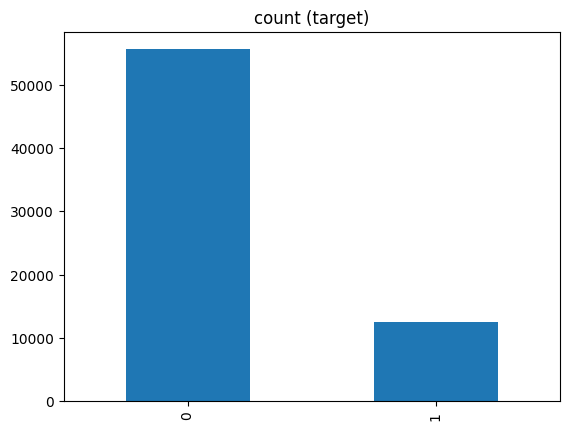

In [26]:
#Class balance inspection
data["delay_15"].value_counts().plot(kind='bar', title='count (target)')
plt.show()

There is a clear problem of class imbalance. By increasing the positive class (delayed flights) overfitting can be generated, and by decreasing the negative class to the level of the positive class, a lot of information is lost. Therefore, there will be a mixture of negative class decrease and positive class oversample. Unsampling decreases the class by 50% and oversampling increases the class by 50%. The same values counts will not be reached, but they will approach convergence.

In [27]:
# Separate class
class_0 = data[data["delay_15"]==0]
class_1 = data[data["delay_15"]==1]

# class count
class_count_0, class_count_1 = data["delay_15"].value_counts()

In [28]:
#Samplig
class_0_under = class_0.sample(int(class_count_0 *0.5))
class_1_over = class_1.sample(int(class_count_1 *1.5), replace=True)

new_data = test_over = pd.concat([class_0_under, class_1_over], axis=0)

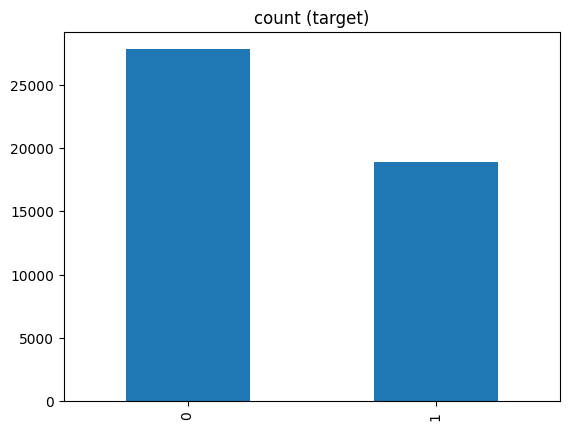

In [29]:
#visualize new class distribution
new_data["delay_15"].value_counts().plot(kind='bar', title='count (target)')
plt.show()

### Train - test split

In [30]:
X = new_data.drop(['delay_15'],axis=1)
y = new_data.loc[:,'delay_15']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=123, test_size = 0.3)

#Model 1 Logistic Regresion

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import recall_score , precision_score, accuracy_score, confusion_matrix , ConfusionMatrixDisplay , precision_recall_curve

#testing logistic regresion as benchmark
log_reg = LogisticRegression( max_iter = 500)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)


from sklearn.metrics import recall_score

print(f' Recall for Logistic Regression is {recall_score(y_test,y_pred)}')
print(f' Precision for Logistic Regression is {precision_score(y_test,y_pred)}')
print(f' Accuracy for Logistic Regression is {precision_score(y_test,y_pred)}')


 Recall for Logistic Regression is 0.21828651195253881
 Precision for Logistic Regression is 0.5424978317432784
 Accuracy for Logistic Regression is 0.5424978317432784


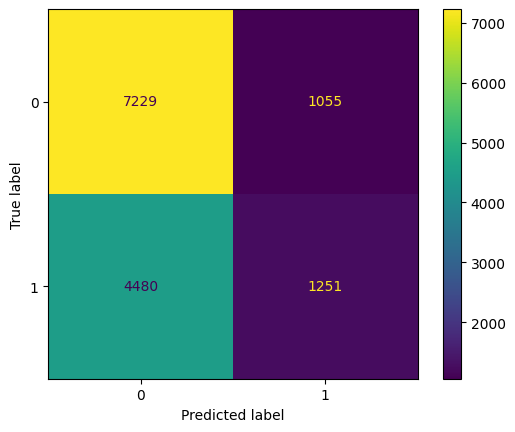

In [32]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Let's analize Precision- Recall curve. We seek to aim probabilities that give us higher values in both metrics (upper right corner).

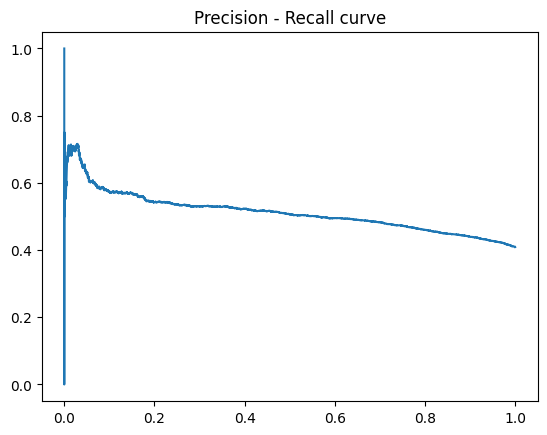

In [33]:
y_proba = log_reg.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve( y_test, y_proba[:,1])
plt.plot(recall, precision)
plt.title ("Precision - Recall curve")
plt.show()


The clasificatori is failing in predicting positive events. I will test 2 more models (time limitation) and take the best model for calibration.


### Support Vector Machine

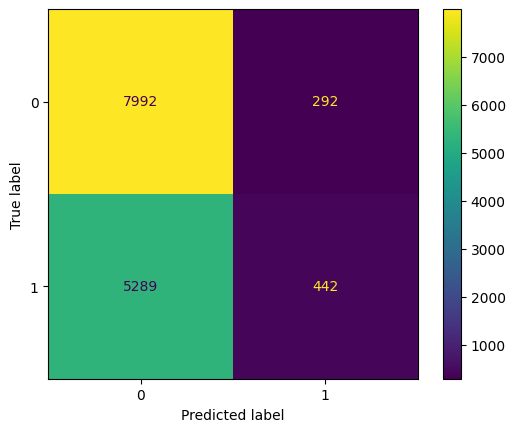

In [34]:
#This cell takes 8 minutes app
from sklearn.svm import SVC
model_SVC = SVC(probability = True)
model_SVC.fit(X_train, y_train)
y_pred_SVC = model_SVC.predict(X_test)
cm_svc = confusion_matrix(y_test,y_pred_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.show()

In [35]:

print(f' Recall for SVM is {recall_score(y_test,y_pred_SVC)}')
print(f' Precision for SVM is {precision_score(y_test,y_pred_SVC)}')
print(f' Accuracy for SVM is {precision_score(y_test,y_pred_SVC)}')


 Recall for SVM is 0.0771244110975397
 Precision for SVM is 0.6021798365122616
 Accuracy for SVM is 0.6021798365122616


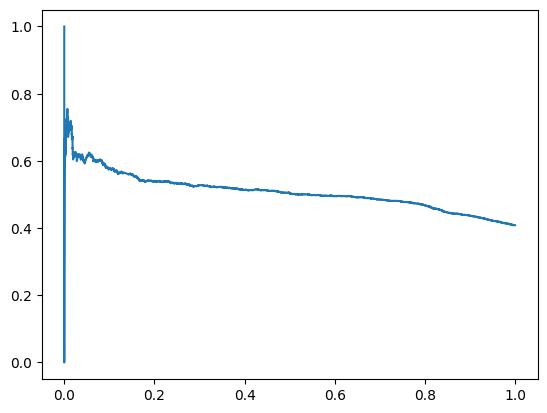

In [36]:
y_proba_SVC = model_SVC.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve( y_test, y_proba_SVC[:,1])
plt.plot(recall, precision)
plt.show()

Even when the accuracy increases, this model is performing worst than logistic for predicting delays. Its precision is higher which is the opposite we are looking for.

### Random Forest

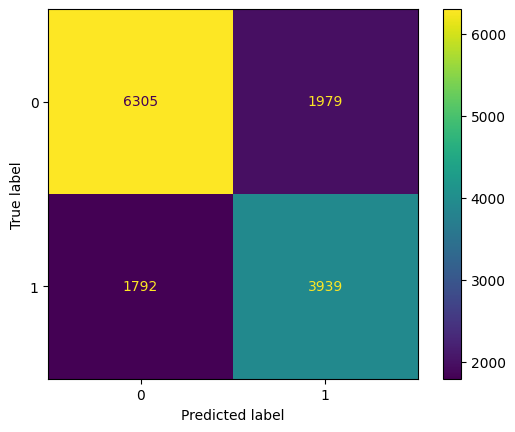

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

In [38]:
print(f' Recall for RF is {recall_score(y_test,y_pred_rf)}')
print(f' Precision for RF is {precision_score(y_test,y_pred_rf)}')
print(f' Accuracy for RF is {precision_score(y_test,y_pred_rf)}')

 Recall for RF is 0.6873146047810156
 Precision for RF is 0.6655964852990875
 Accuracy for RF is 0.6655964852990875


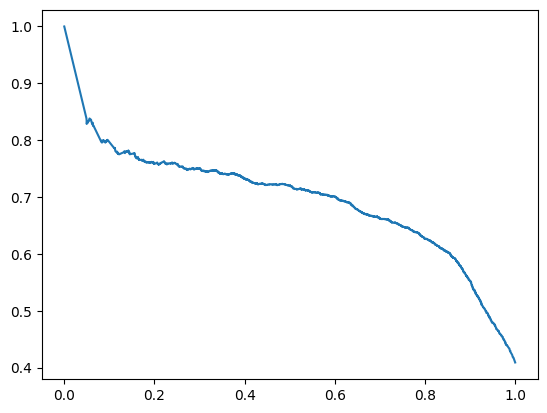

In [39]:
y_proba_rf = model_rf.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve( y_test, y_proba_rf[:,1])
plt.plot(recall, precision)
plt.show()

The curve for this model is showing a better area under the curve, the true predicted events are higher which aligns with the excersise I am doing. 
 Let's proceed with calibration to aim better results. 
 I will use search grid with Cross Validation and then use test data for comparison.

In [40]:
#this cell take 4 minutes to run 
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [2, 4, 6],
              'min_samples_split': [2, 3 , 4]
              }

est = RandomForestClassifier()
#I will use F1 as metric since recall and precision are interesting metrics in this context.
gs_cv = GridSearchCV(est, param_grid, scoring='f1',).fit(X_train,y_train)

print(f'Best hyperparameters: {gs_cv.best_params_}  ')

Best hyperparameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 50}  


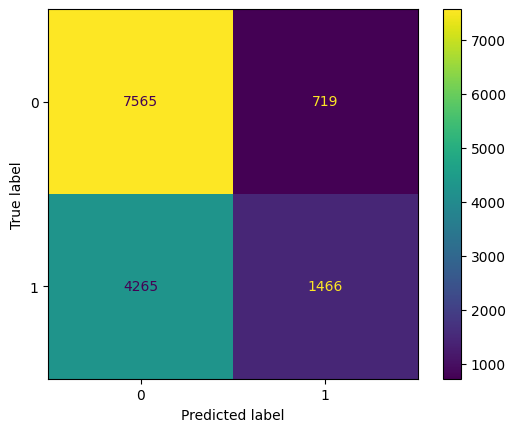

In [41]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth= 6, min_samples_split= 3, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

In [42]:
print(f' Recall for RF is {recall_score(y_test,y_pred_rf)}')
print(f' Precision for RF is {precision_score(y_test,y_pred_rf)}')
print(f' Accuracy for RF is {precision_score(y_test,y_pred_rf)}')

 Recall for RF is 0.25580177979410224
 Precision for RF is 0.6709382151029748
 Accuracy for RF is 0.6709382151029748


As seen, with "similar" precision, the recall is better using default parameter for Random Forest. The accuracy is also better in that case. 
Let's proceed with impact of each features and get insights for business.

In [43]:
#run the selected model
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

#Probability of flight delay
y_proba_rf = model_rf.predict_proba(X_test)

<BarContainer object of 10 artists>

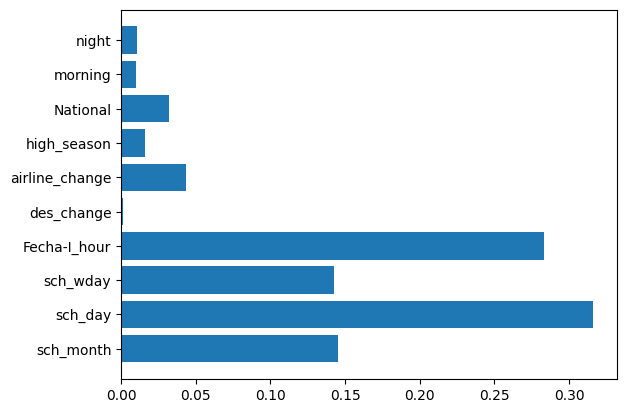

In [44]:
plt.barh(X_train.columns, model_rf.feature_importances_)

For our model the most important variables are: 
Scheadule hour of the flight, Scheadule day of the week (monday to sunday), calendar day and month. 
Less important is the change of destination. Information captured in morning, night variable are "repited" with hour. As hour is important and nigh and morning variables are not, they can be removed from the model.

y_proba_rf variable reflects the probability of a flight gets delay. To capture that information with new data please use 
- model_rf.predict_proba(new_data)

#To improve the model
- Sampling process can be tested to help to improve model performance. 
- variables less important can be removed. 
- more detailed search grid with extra parameters

In other hand, other models can be tested as well. As I am working with flag data, other assembly models (bagging and boosting) could adress pretty well the complexity of this problem. 


## With more time
With more time, 
- I could have check some cases that I commented as "Adress later"
- I could improve visualizations: stack bars for delay distribution, error bars. Titles, labels and annotations for readers. 
- Provide more detail about the results: the hour is important, but what time is getting more delays?, is this because there are more flight at that time or because the percentage [delay/ no delay] is higher?
- Check assumptions reading more about the industry.
- I would also like to test models by airline group (by business knowledge or clustering models) to identify especific causes that can delay a flight by airline group. Or high season or not, moment of the day. Discuss this approaches with the team ans select a new approach to get new insights.